In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones necesarias para que funcionen las demas funciones .

In [3]:
def forward(a,b):
    '''Funcion que retorna un array "x" despues de hacer la sustitucion forward'''
    n = a.shape[0] # la dimension de la matriz 
    
    # https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.html
    # estamos creando un matriz columna 
    x = np.ndarray( shape=(n,1), dtype = np.float64 )
    
    ### TODO DENTRO DE UN FOR . (ELIMINA)#### 
    # espero se entienda el por que del -1 
    x[n-1] = b[n-1]/a[n-1][n-1] # comenzamos por el ultimo
       
    # luego hacemos el algoritmos de adelante hacia atras
    # "i" en general siempre se referira a filas y "j" a columnas
    
    # Espero se entienda el por que de "n-2"
    # es debido a la funcion range(start,final,pasos)
    for i in range(n-2,-1,-1):
        
        # sera que hara cuenta de todo lo que se restara a b[i]
        # lo ponemos aqui debido a no llamarla demasiadas veces
        summ = b[i] 
    
        for j in range(i+1,n):
            summ -= a[i][j]*x[j]
        
        # finalmente asignamos
        x[i] = summ/a[i][i]
    return x

# # Aca implementare backward 
def backward(a,b):
    '''Funcion que retorna un array "x" despues de hacer la sustitucion backward '''
    
    n = a.shape[0] # la dimension de la matriz 
    # https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.html
    # estamos creando un matriz columna 
    x = np.ndarray( shape=(n,1), dtype = np.float64 )
    x[0] = b[0]/a[0][0] # comenzamos con el primero
       

    for i in range(1,n):
        # lo ponemos aqui debido a no llamarla demasiadas veces
        summ = b[i] 
        for j in range(0,i):
            summ -= a[i][j]*x[j]
        # finalmente asignamos
        x[i] = summ/a[i][i]
    
    return x



# Funcion de la que me tomo mas tiempo hacerlo 
def gauss(a,b):
    '''Funcion que retorna un array "x" despues de hacer una eliminacion de Gauss con pivoteo'''
    
    n = a.shape[0]
    # https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.html
    # estamos creando un matriz columna 
    x = np.ndarray( shape=(n,1), dtype = np.float64 )   
    a_copy = a.copy() # con el fin de hacer segumiento a la matriz al final . 
    s = [] # lista para alojar los valores maximos (es parte del pivoteo)
    l = [] # usada para reordenar como se hara la eliminacion
    
    # #### LLENAMOS LA LISTA "S" CON LOS VALORES MAXIMOS  #######
    for i in range(0,n):
        l.append(i) # vamos agregando .Establecemos esta matriz
        smax = 0 # el maximo de una fila es importante para el pivote
        for j in range(0,n):
            # se escoje el maximo entre todos los elemnos de una fila
            smax = max(smax,abs(a[i][j])) 
            
        s.append(smax) # alojamos el maximo de la fila
    
    # ---------- print('l inicial ' ,l) (SEGUIMIENTO)
    # --------- print('s inicial ', s) (SEGUIMIENTO)
    
    # ##### PIVOTEO(ESCOJEMOS LA FILAS PIVOTES Y ELIMINAMOS) #########
    # k hace referencia a la columna donde se hara ceros seran creados en el array a_ij
    # Pero recuerda que los ceros no se crean realmente . Por que en esos espacios almacenamos 
    # otras cosas(los multiplicadorese para descomposicion LU) . 
    for k in range(0,n-1):
        
        rmax = 0 
        # ##### SE ESCOJE LA FILA PIVOTE EN ESTE BLOQUE #########
        for i in range (k,n):
            
            # esto es para escoger la correcta fila pivote
            # se esta dividiendo (elemnto de columna k y fila [k-n][k])/los Smax
            r = abs( a[l[i]][k] / s[l[i]] )
            if (r > rmax):
                # j = i es para escoger el correcto pivote
                # rmax = r es para escoger la maxima proporcion(ratio)
                rmax,j = r,i
                # al final no usaremos rmax , solo es necesario para detener el if cuando sea necesario
              
        l[j],l[k] = l[k],l[j] # luego se cambia el lugar donde ocurre el maximo proporcion
        
        
        # ####### ELIMINACION GAUSSIANA PERO LA FILA PIVOTE LO DETERMINA "l" ################## 
        for i in range(k+1,n):
            xmult = a[l[i]][k]/a[l[k]][k]
            a[l[i]][k] = xmult # los guardo para fines de LU y para eliminar "b"
            
            a_copy[l[i]][k] -= xmult*a[l[k]][k] # para hacer segumiento(se puede borrar) 
            
            # este for hara segumiento de que se haga operaciones en toda la fila que no es pivot
            for j in range(k+1,n):
                a[l[i]][j] -= xmult*a[l[k]][j]
                a_copy[l[i]][j] -= xmult*a[l[k]][j] # para hacer seguimiento(se puede borrar)
    
    # --------- print('l final ' ,l) (SEGUIMIENTO)
    # --------- print('a final copy \n' , a_copy) (SEGUIMIENTO)
    # ##### SEGIMOS PIVOTEANDO PERO PARA LA MATRIZ b###   
    for k in range(0,n-1):
        
        # recuerda el que ahora maneja el orden sera la lista "l"
        # debemos hacer las operaciones en el mismo orden que hemos hecho para "a"
        for i in range(k+1,n):
            b[l[i]] -= a[l[i]][k]*b[l[k]]
            
    #------ print('b final \n ' , b) (SEGUIMIENTO)
    
    # ######### AHORA HACEMOS LA SUSTITUCION BACKWARD ##########
    
    # espero se entienda por que -1 . Es por la cuenta por cero
    x[n-1] = b[l[n-1]]/a[l[n-1]][n-1]
    
    for i in range(n-2,-1,-1):
        summ = b[l[i]]
        for j in range(i+1,n):
            summ -= a[l[i]][j]*x[j]
            
        x[i] = summ/a[l[i]][i]
        
        
    return x


# Aca implementare monomios .

In [4]:
def creador_p_n_monomio(data):
    n = data.shape[1]
    # creamos la dimension de la matriz 
    a = np.ndarray( shape=(n,n), dtype = np.float64 )
    
    #### llenamos la matriz ######
    for j in range(0,n):
        for i in range(0,n):
            a[i,j] = data[0,i]**(j) 
    
    
    ##### resolvemos el sistema de ecuaciones ############
    ############ Aca esta al gusto de la persona que metodo usar 
    coef = gauss(a,data[1]) # usare gauss ( Esta funcion retorna una lista)
    ######## creamos la funcion #########
    def p_n(x):
        pn = np.float64(0)
        for i in range(0,n):
            # el cero al final es por que la lista es un vector columna
            pn = pn + coef[i,0]*x**(i)
            
        return pn
    
    return p_n

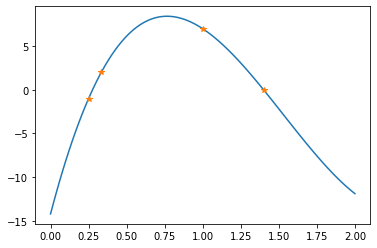

In [5]:
data = np.array([ [1/3,1/4,1,1.4],
                  [2,-1,7,0] ],dtype=np.float64)
p_n_monomio = creador_p_n_monomio(data.copy())
r = np.linspace(0,2,100)
plt.plot(r,[p_n_monomio(arg) for arg in r.copy() if True])
plt.plot(data[0],data[1],'*')

# Aca implementare la interpolacion de Lagrange
<img src="lagrange.png">

In [6]:
def creador_p_n_lagrange(data):
    n = data.shape[1] # necesito cuantos puntos tengo . 
    
    # Creamos la funcion que vamos a devolver 
    def p_n(x):
        pn = 0
        for i in range(0,n):
            mult = 1
            # comenzamos a crear la funcion l_i
            for j in range(0,n):
                if i == j :
                    # Es para que siga iterando pero no considere esta iteracion
                    continue 
                mult *= (x-data[0,j])/(data[0,i]-data[0,j])
            
            # sumamos 
            pn += (mult*data[1,i])
                    
        return pn
    
    return p_n

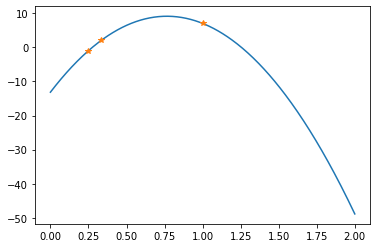

In [7]:
data = np.array([ [1/3,1/4,1],
                  [2,-1,7] ],dtype=np.float64)
p_n_lagrange = creador_p_n_lagrange(data.copy())
r = np.linspace(0,2,400)
plt.plot(r,[p_n_lagrange(arg) for arg in r.copy() if True])
plt.plot(data[0],data[1],'*')

# Aca implemetare la interpolacion de Newton , el mas efectivo

In [8]:
def creador_p_n_newton1(data):
    n = data.shape[1] # necesito cuantos puntos tengo . 
    
    ####### Primero creamos los coeficientes a ( los coeficientes del polinomio de newton)########
    a = [] # lista vacia
    for i in range(0,n):
        # se llena con los valores de los y_i
        a.append(data[1,i])
    for j in range(1,n):
        for i in range(n-1,j-1,-1):
            a[i] = (a[i]-a[i-1]) / (data[0,i] - data[0,i-j])
        

    ######## Creamos la funcion que vamos a devolver(el polinomio interpolado) ##########
    def p_n(x):
        pn = a[n-1] # inicio ....
        for k in range(2,n+1):
            pn = a[n-k] + (x-data[0,n-k])*pn
                  
        return pn
    
    ##### Se retorna la funcion  
    return p_n

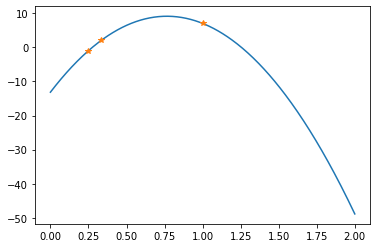

In [38]:
data = np.array([ [1/3,1/4,1], [2,-1,7] ],dtype=np.float64)
p_n_newton1 = creador_p_n_newton1(data.copy())
r = np.linspace(0,2,400)
plt.plot(r,[p_n_newton1(arg) for arg in r.copy() if True])
plt.plot(data[0],data[1],'*')

# Aca implementare la interpolacion de Newton , como combinacion lineal 

In [10]:
def creador_p_n_newton2(data):
    n = data.shape[1]
    # creamos la dimension de la matriz 
    a = np.zeros( shape=(n,n), dtype=np.float64 )
    
    #### llenamos la matriz ######
    
    for i in range(0,n):
        a[i,0] = 1 # llenamos con 1's la primera columna
    
    for i in range(1,n):
        for j in range(1,i+1):
            mult = 1
            # el "k" es para iterar sobre la data
            # fijate que "k" toma valores de 0 - j-1
            for k in range(0,j):
                # x viene a ser reemplazada por data[i]
                mult = mult*(data[0,i]-data[0,k])
            
            a[i,j] = mult # se llena 
            
            
                           
    
    ##### resolvemos el sistema de ecuaciones ############
    ############ Aca esta al gusto de la persona que metodo usar 
    coef = backward(a,data[1]) # usare gauss ( Esta funcion retorna una lista)
    
    ######## creamos la funcion #########
    def p_n(x):
        pn = coef[n-1,0]
        for k in range(2,n+1):
            # el cero al final es por que la lista es un vector columna
            pn = coef[n-k,0] + (x-data[0,n-k])*pn
            
        return pn
    
    return p_n

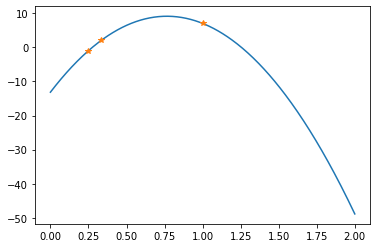

In [11]:
data = np.array([ [1/3,1/4,1], [2,-1,7] ],dtype=np.float64)
p_n_newton2 = creador_p_n_newton2(data.copy())
r = np.linspace(0,2,400)
plt.plot(r,[p_n_newton2(arg) for arg in r.copy() if True])
plt.plot(data[0],data[1],'*')

# Aca implementare la extraccion de data usando los puntos de chebyshev
http://www.math.wsu.edu/faculty/genz/448/lessons/l303.pdf
https://en.wikipedia.org/wiki/Chebyshev_nodes
<img src="node_chevy.png">
<img src="nodos_profesor.png">

##### consejo (debo estudiar polinomios de chevyshev para enteder esto) 

# Implementare los puntos de chevyshev

In [12]:
def punto_chevy1(inf,sup,n=2):
    x = []
    # recuerda que se quiere escoger n+1 puntos
    for j in range(0,n+1):
        valor = inf+(sup-inf)/2*( 1+ np.cos(j*np.pi/n) ) 
        x.append(valor)
        
    return np.array(x,dtype=np.float64)


def punto_chevy2(inf,sup,n=2):
    x = []
    # recuerda que se quiere escoger n+1 puntos
    for j in range(1,n+2):
        valor = (sup+inf)/2 + (sup-inf)/2* np.cos( ( (2*j-1)*np.pi) /(2*(n+1) ) )  
        x.append(valor)
        
    return np.array(x,dtype=np.float64)

In [13]:
x1 = punto_chevy1(-1,1,10)
x2 = punto_chevy2(-1,1,10)
x1,x2

(array([ 1.        ,  0.95105652,  0.80901699,  0.58778525,  0.30901699,
         0.        , -0.30901699, -0.58778525, -0.80901699, -0.95105652,
        -1.        ]),
 array([ 9.89821442e-01,  9.09631995e-01,  7.55749574e-01,  5.40640817e-01,
         2.81732557e-01,  2.83276945e-16, -2.81732557e-01, -5.40640817e-01,
        -7.55749574e-01, -9.09631995e-01, -9.89821442e-01]))

# Aca implementare spline lineal

In [14]:
def creador_spline_lineal(data):
    
    n = data.shape[1]
    def spline1(x):
        for i in range(n-2,-1,-1):
            # cuando encontremos el intervalo retornamos la funcion lineal especifica 
            # recuerda que asumimos que los puntos estan ordenados
            # parece raro esta condicion pero funciona xd . 
            # va a encontrar el intervalo que correcto
            if (x-data[0,i]) >= 0:
                return data[1,i] + (x-data[0,i])* ( (data[1,i+1]- data[1,i] )  / ( data[0,i+1]-data[0,i] ) )
         
        # si no esta x en algun intervalo esta en la parte izquierda del rango donde interpolamos
        i = 0
        return data[1,i] + (x-data[0,i])* ( (data[1,i+1]- data[1,i] )  / ( data[0,i+1]-data[0,i] ) )
        
    return spline1

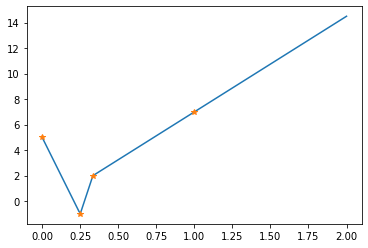

In [15]:
data = np.array([ [0,1/4,1/3,1], [5,-1,2,7] ],dtype=np.float64)
spline1 = creador_spline_lineal(data.copy())
r = np.linspace(0,2,200)
plt.plot(r,[spline1(arg) for arg in r.copy() if True])
plt.plot(data[0],data[1],'*')

# Aca implementare spline cuadratico 
<img src="spline_cuadratica.png">

In [16]:
def creador_spline_cuadratico(data):
    n = data.shape[1]
    # aca acumulare las costantes que necesito
    z = np.array([0]*n, dtype=np.float64)
    
    # condicion inicial para que mi primer spline sea una recta
    z[0] = (data[1,1]-data[1,0]) / (data[0,1]-data[0,0])
    
    # Usamos la funcion recursiva 
    for i in range(0,n-1):
        z[i+1] = -1*z[i] + 2*(data[1,i+1]-data[1,i]) / (data[0,i+1]-data[0,i])
    
    # creamos la funcion
    def spline2(x):
        for i in range(n-2,-1,-1):
            # buscamos el punto y retornamos el valor evaluado en ese intervalo
            if (x-data[0,i]) >= 0:
                return ( (z[i+1]-z[i]) / (2*(data[0,i+1]-data[0,i])) ) * (x-data[0,i])**2 + z[i]*(x-data[0,i]) + data[1,i]   
         
        # si no esta x en algun intervalo esta en la parte izquierda del rango donde interpolamos
        i = 0
        return ( (z[i+1]-z[i]) / (2*(data[0,i+1]-data[0,i])) ) * (x-data[0,i])**2 + z[i]*(x-data[0,i]) + data[1,i]  
    
    return spline2

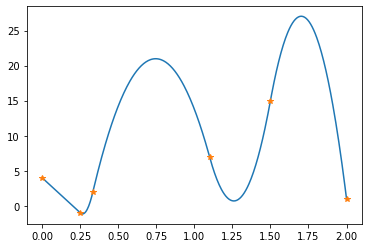

In [17]:
data = np.array([ [0,1/4,1/3,1.1,1.5,2], [4,-1,2,7,15,1] ],dtype=np.float64)
spline2 = creador_spline_cuadratico(data.copy())
r = np.linspace(0,2,400)
plt.plot(r,[spline2(arg) for arg in r.copy() if True])
plt.plot(data[0],data[1],'*')

# Aca implementare spline cubico

In [18]:
def creador_spline_cubico(data):
    n = data.shape[1]
    # Por esta vez guardare dividire la data 
    t = data[0] # los valores "X"
    y = data[1] # los valores "y"
    # aca acumulare las costantes que necesito
    ## recordar que z[i] = spline3''(t[i])
    z = np.array([0]*n, dtype=np.float64)
    
    ############# COMENZAMOS HALLANDO LOS COEFICIENTES Z QUE NOS AYUDARAN #############
    # Lo siguiente es creado con fines para hacer calculos intermedios
    h = np.array([0]*(n-1), dtype=np.float64)
    b = np.array([0]*(n-1), dtype=np.float64)
    u = np.array([0]*(n-1), dtype=np.float64) # solo usare de (1) a (n-1)
    v = np.array([0]*(n-1), dtype=np.float64) # solo usare de (1) a (n-1)
    for i in range(0,n-1):
        h[i] = t[i+1]-t[i]
        b[i] = (y[i+1]-y[i])/h[i]
        
    u[1] = 2*(h[0]+h[1])
    v[1] = 6*(b[1]-b[0])
    
    for i in range(2,n-1):
        u[i] = 2*(h[i]+h[i-1])- ( h[i-1]**2 ) /u[i-1]
        v[i] = 6*(b[i]-b[i-1]) - (h[i-1]*v[i-1])/ u[i-1]
    
    z[n-1] = 0 # por la condicion que hemos impuesto (esto puede cambiar)
    # espero se entienda por que el -2
    for i in range(n-2,0,-1):
        z[i] = (v[i]-h[i]*z[i+1])/u[i]
    
    z[0] = 0 # por la condicion que hemos impuesto (esto puede cambiar)
    
    ########### CREAMOS LA FUNCION O EN OTRAS PALABRAS LA EVALUACION ######
    def spline3(x):
        for i in range(n-2,-1,-1):
            # buscamos el intervalo deseado
            if (x-t[i]) >= 0:
                h = t[i+1] - t[i]
                tempo = (z[i]/2) + (x-t[i])*(z[i+1]-z[i])/(6*h)
                tempo = -1*(h/6)*(z[i+1]+2*z[i]) + (y[i+1]-y[i])/h + (x-t[i])*(tempo)
                valor = y[i] + (x-t[i])*tempo
                return valor
            

        # si no esta x en algun intervalo esta en la parte izquierda del rango donde interpolamos
        i = 0
        h = t[i+1] - t[i]
        tempo = (z[i]/2) + (x-t[i])*(z[i+1]-z[i])/(6*h)
        tempo = -1*(h/6)*(z[i+1]+2*z[i]) + (y[i+1]-y[i])/h + (x-t[i])*(tempo)
        valor = y[i] + (x-t[i])*tempo
        return valor
    
    return spline3
    

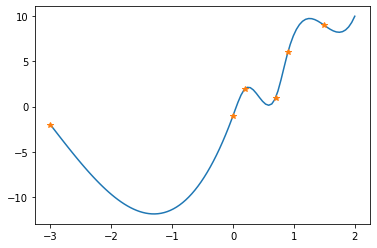

In [19]:
data = np.array([ [-3,0,1/5,0.7,0.9 ,1.5], [-2,-1,2,1,6,9] ],dtype=np.float64)
spline3 = creador_spline_cubico(data.copy())
r = np.linspace(-3,2,100)
plt.plot(r,[spline3(arg) for arg in r.copy() if True])
plt.plot(data[0],data[1],'*')

# Ejercicio Numero 1 

########## PREGUNTA 1 ##############


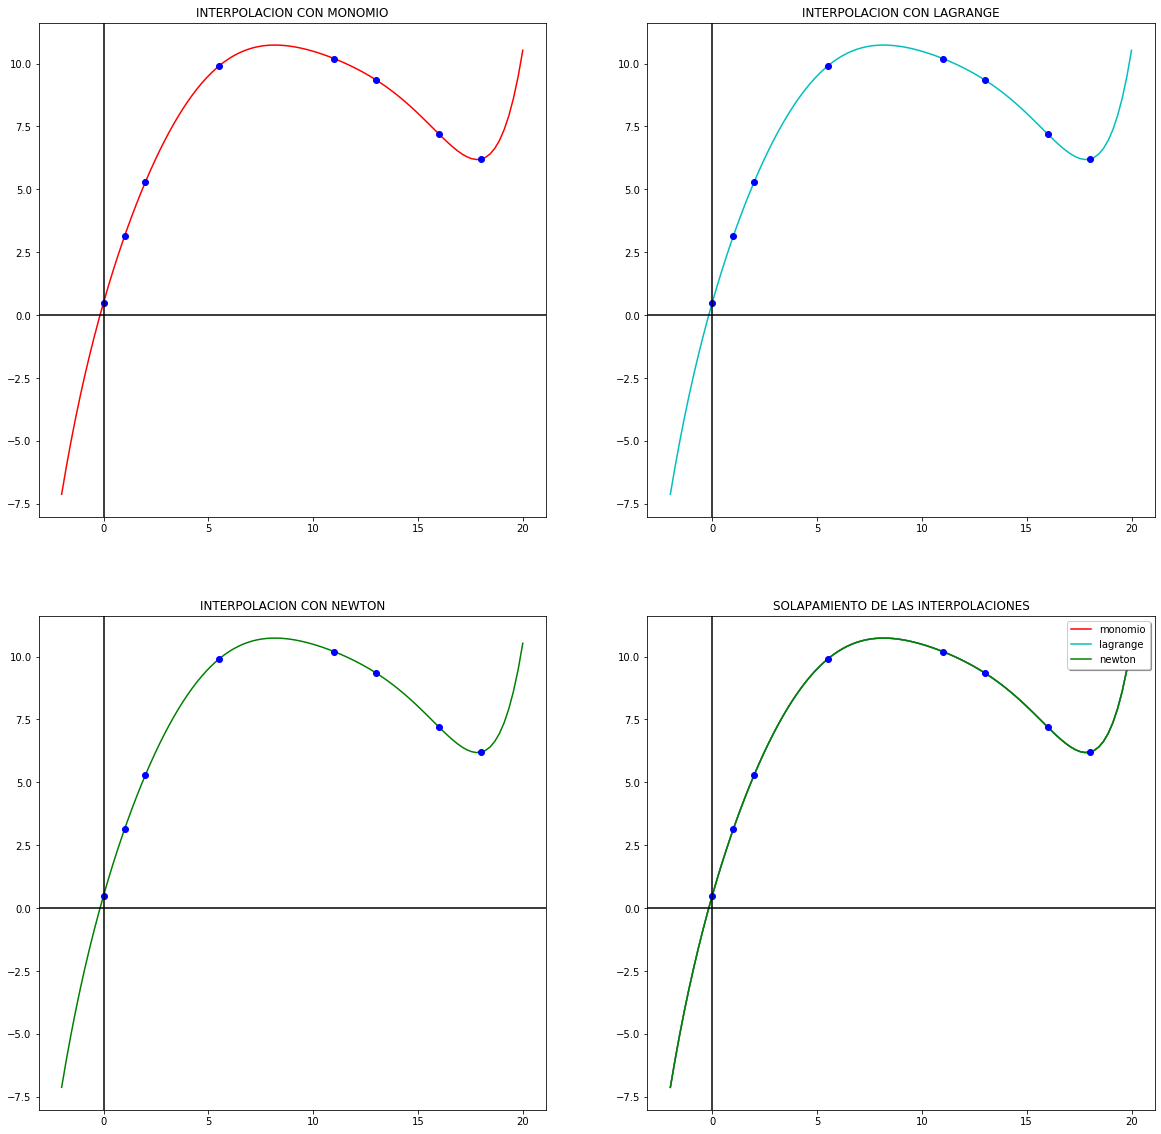

El valor de x = 8 usando interpolaciones es ......:
Usando interpolacion de monomio 10.734502995519028
Usando interpolacion de lagrange 10.73450299551904
Usando interpolacion de newton 10.734502995519035


In [20]:
print("########## PREGUNTA 1 ##############")

data = np.array([[0,1,2,5.5,11,13,16,18],[0.5,3.134,5.3,9.9,10.2,9.35,7.2,6.2]],
               dtype=np.float64)

pn1 = creador_p_n_monomio(data.copy())
pn2 = creador_p_n_lagrange(data.copy())
pn3 = creador_p_n_newton2(data.copy())

x1 = np.linspace(-2,20,100)
x2 = np.linspace(-2,20,100)
x3 = np.linspace(-2,20,100)
fig, axes = plt.subplots(nrows=2,ncols=2 , figsize = (20,20)) # fig es la figura y axes son los ejes (son elementos de cada figura)

axes[0,0].plot(x1,pn1(x1),'r')
axes[0,0].plot(data[0],data[1],'ob')
axes[0,0].axhline(0, color="black")
axes[0,0].axvline(0, color="black")
axes[0,0].set_title('INTERPOLACION CON MONOMIO')


axes[0,1].plot(x2,pn2(x2),'c')
axes[0,1].plot(data[0],data[1],'ob')
axes[0,1].axhline(0, color="black")
axes[0,1].axvline(0, color="black")
axes[0,1].set_title('INTERPOLACION CON LAGRANGE')


axes[1,0].plot(x3,pn3(x3),'g')
axes[1,0].plot(data[0],data[1],'ob')
axes[1,0].axhline(0, color="black")
axes[1,0].axvline(0, color="black")
axes[1,0].set_title('INTERPOLACION CON NEWTON')

axes[1,1].plot(x1,pn1(x1),'r',label="monomio")
axes[1,1].plot(x2,pn2(x2),'c',label="lagrange")
axes[1,1].plot(x3,pn3(x3),'g',label="newton")
axes[1,1].plot(data[0],data[1],'ob')
axes[1,1].axhline(0, color="black")
axes[1,1].axvline(0, color="black")
axes[1,1].set_title('SOLAPAMIENTO DE LAS INTERPOLACIONES')
axes[1,1].legend( loc='upper right', shadow=True) # se pone la legenda 

plt.show()


print("El valor de x = 8 usando interpolaciones es ......:")
print(f"Usando interpolacion de monomio {pn1(8)}")
print(f"Usando interpolacion de lagrange {pn2(8)}")
print(f"Usando interpolacion de newton {pn3(8)}")

# Ejercicio Numero 2

- [runge](https://en.wikipedia.org/wiki/Runge%27s_phenomenon#:~:text=In%20the%20mathematical%20field%20of,set%20of%20equispaced%20interpolation%20points.)

In [21]:
# funcion que usaremos
def funcion_runge(x):
    return (1+(x**2)  )**(-1)

def funcion_prueba(x):
    valor1 = np.tanh(20*np.sin(12*x)) 
    valor2 = 1/50 * np.exp(3*x)*np.sin(300*x)
    return valor1+valor2

def error(f,interpolf,x):
    return abs( f(x)-interpolf(x) )

# Parte 1 ( puntos equidistantes) 

################ PRPEGUNTA NUMERO 2 PARTE 1 ################## 


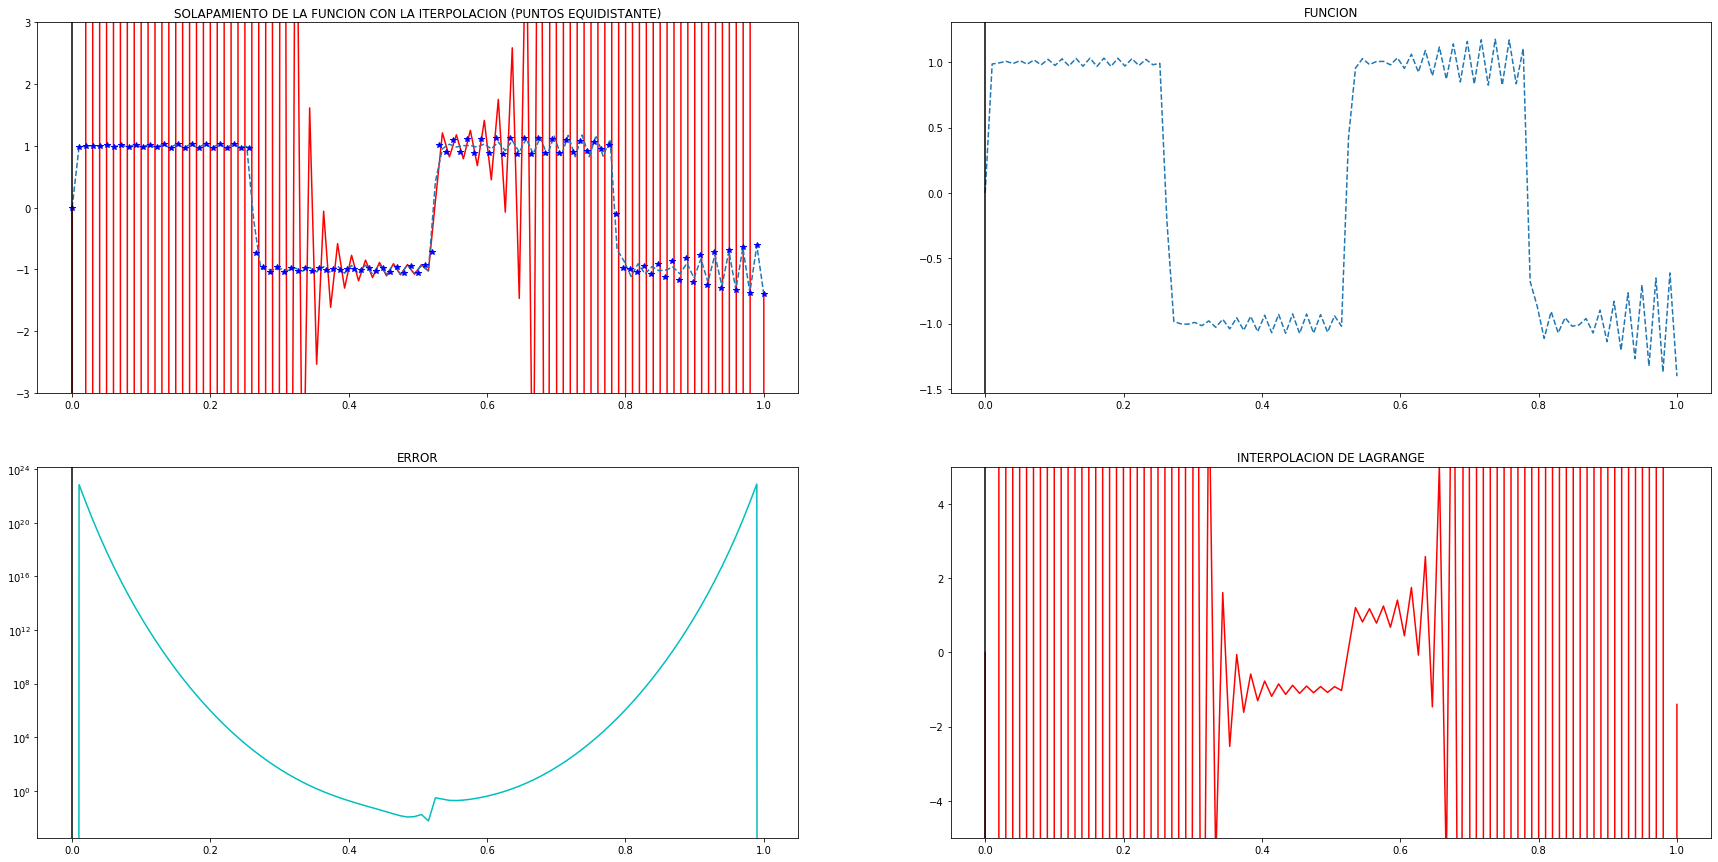

In [47]:
print("################ PRPEGUNTA NUMERO 2 PARTE 1 ################## ")
# Armamos la data que tiene puntos igualmente espaciados

# Armamos la data con los puntos de chevyshev 
x2 = np.linspace(0,1,99)   # si pones 100 los errores te salen negativos :S (lo cual no tiene sentido pero intentalo)
y2 = funcion_prueba(x2) # recuerda que esta en radianes
data1 = np.array([x2,y2],dtype= np.float64)
            
pn_lagrange1 = creador_p_n_lagrange(data1.copy())

x1rango = np.linspace(0,1,100)
fig, axes = plt.subplots(nrows=2,ncols=2 , figsize = (30,15)) # fig es la figura y axes son los ejes (son elementos de cada figura)

######## Ojo cuando pones escalal logaritmica no toma los elementos negativos
axes[0,0].plot(x1rango,pn_lagrange1(x1rango),'r')
axes[0,0].plot(x1rango,funcion_prueba(x1rango),'--')
axes[0,0].plot(data1[0],data1[1],'*b')
axes[0,0].axvline(0, color="black")
axes[0,0].set_title('SOLAPAMIENTO DE LA FUNCION CON LA ITERPOLACION (PUNTOS EQUIDISTANTE)')
axes[0,0].set_ylim(-3, 3)


axes[1,0].plot(x1rango,error(funcion_prueba,pn_lagrange1,x1rango),'c')
axes[1,0].axvline(0, color="black")
axes[1,0].set_title('ERROR')
axes[1,0].set_yscale("log")


axes[0,1].plot(x1rango,funcion_prueba(x1rango),'--')
axes[0,1].axvline(0, color="black")
axes[0,1].set_title('FUNCION')


axes[1,1].plot(x1rango,pn_lagrange1(x1rango),'r')
axes[1,1].axvline(0, color="black")
axes[1,1].set_title('INTERPOLACION DE LAGRANGE')
axes[1,1].set_ylim(-5, 5)



plt.show()

# Parte 1 ( puntos de chevysev) 

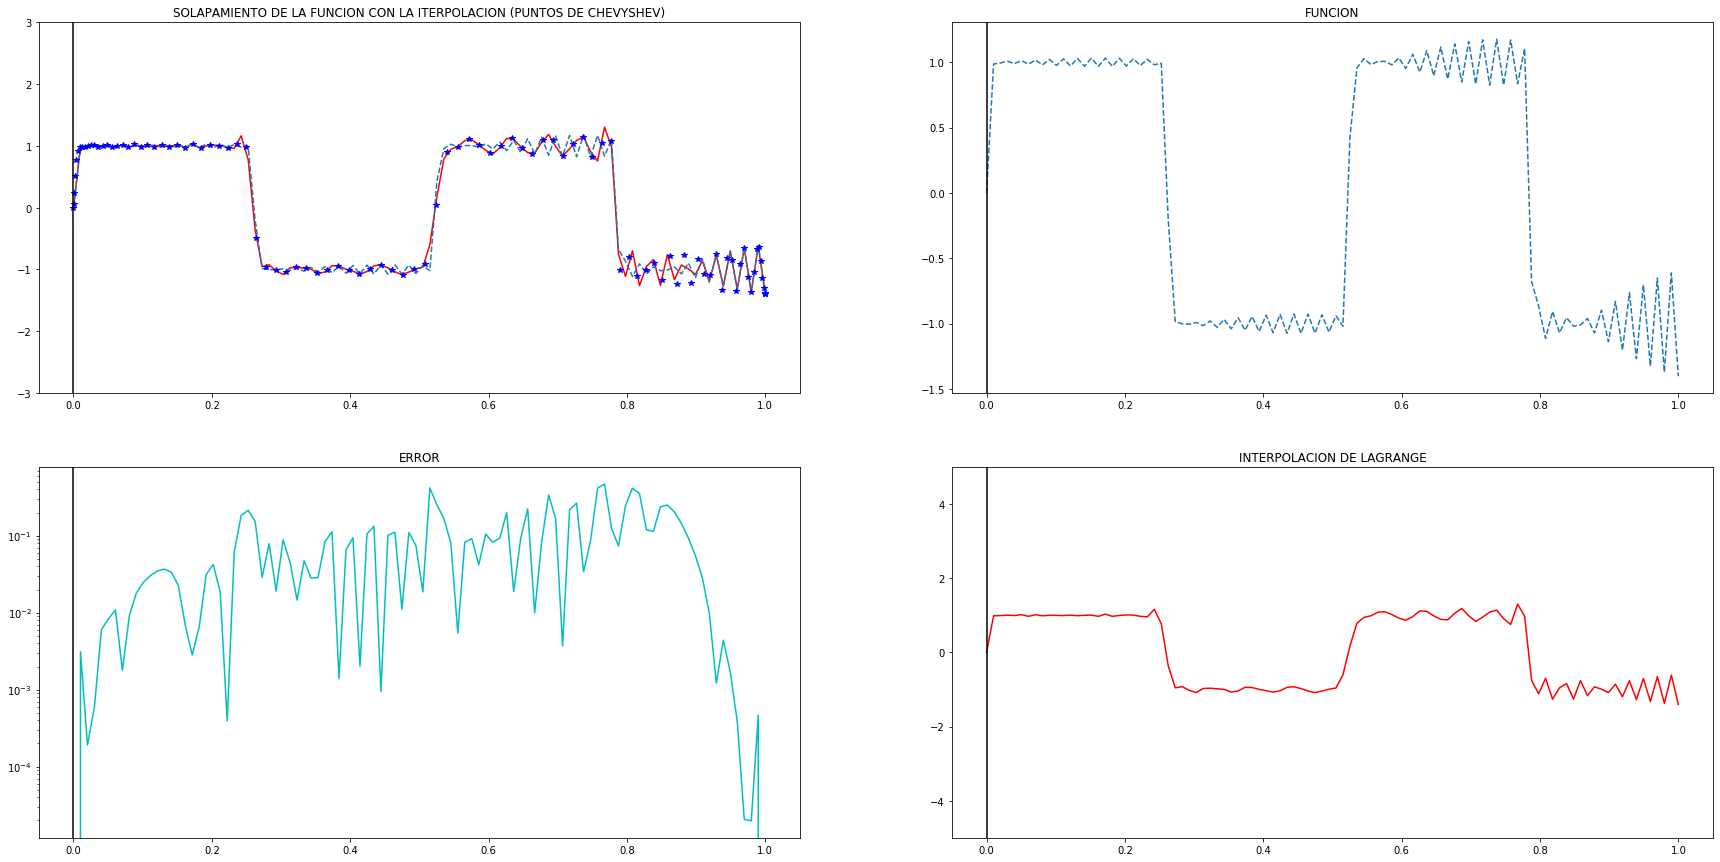

In [33]:

# Armamos la data con los puntos de chevyshev 
x2_inverso = punto_chevy1(0,1,n=99) # 100 puntos necesitamos ( se pone 99 debido a como esta definida la funcion)
x2 = np.array( [arg for arg in reversed(x2_inverso) if True ] , dtype=np.float64) # con esto inviertes   
y2 = funcion_prueba(x2) # recuerda que esta en radianes
data2 = np.array([x2,y2],dtype= np.float64)
            
pn_lagrange2 = creador_p_n_lagrange(data2.copy())

x1rango = np.linspace(0,1,100)
fig, axes = plt.subplots(nrows=2,ncols=2 , figsize = (30,15)) # fig es la figura y axes son los ejes (son elementos de cada figura)

######## Ojo cuando pones escalal logaritmica no toma los elementos negativos
axes[0,0].plot(x1rango,pn_lagrange2(x1rango),'r')
axes[0,0].plot(x1rango,funcion_prueba(x1rango),'--')
axes[0,0].plot(data2[0],data2[1],'*b')
axes[0,0].axvline(0, color="black")
axes[0,0].set_title('SOLAPAMIENTO DE LA FUNCION CON LA ITERPOLACION (PUNTOS DE CHEVYSHEV)')
axes[0,0].set_ylim(-3, 3)


axes[1,0].plot(x1rango,error(funcion_prueba,pn_lagrange2,x1rango),'c')
axes[1,0].axvline(0, color="black")
axes[1,0].set_title('ERROR')
axes[1,0].set_yscale("log")


axes[0,1].plot(x1rango,funcion_prueba(x1rango),'--')
axes[0,1].axvline(0, color="black")
axes[0,1].set_title('FUNCION')


axes[1,1].plot(x1rango,pn_lagrange2(x1rango),'r')
axes[1,1].axvline(0, color="black")
axes[1,1].set_title('INTERPOLACION DE LAGRANGE')
axes[1,1].set_ylim(-5, 5)



plt.show()


# Parte 2 

################## PREGUNTA NUMERO 2 PARTE 2###################
1   0.4699389299068265
2   0.08667646926877137
3   0.0381897294203673
4   0.0058952936691212265
5   0.0035031458335308407
6   0.00038029222909718996


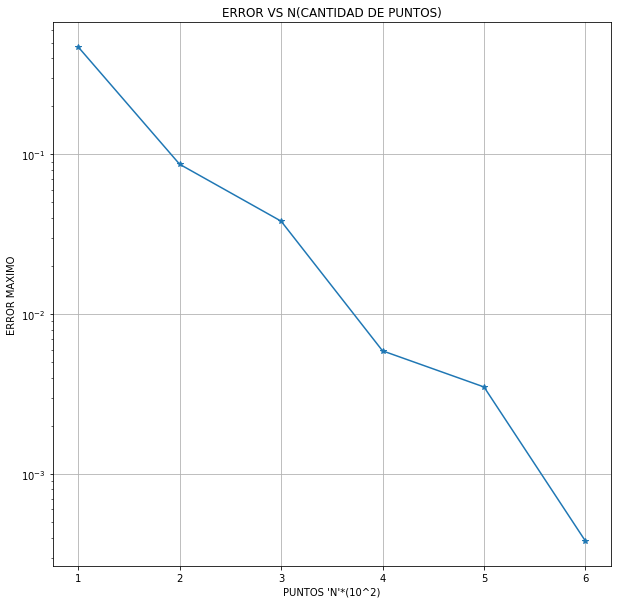

In [24]:
print("################## PREGUNTA NUMERO 2 PARTE 2###################")
error_max = []
for i in range(1,7):
    # crear los puntos de chevyshev
    x2_inverso = punto_chevy1(0,1,n=(i*100)- 1 )  # 100 puntos necesitamos ( se pone 99 debido a como esta definida la funcion)
    x2 = np.array( [arg for arg in reversed(x2_inverso) if True ] , dtype=np.float64) # con esto inviertes   
    y2 = funcion_prueba(x2) # recuerda que esta en radianes
    data2 = np.array([x2,y2],dtype= np.float64)
            
    pn_lagrange2 = creador_p_n_lagrange(data2.copy()) ### problema l......... 1/0 
    
    
    x1rango = np.linspace(0,1,100)
    error_rango = error(funcion_prueba,pn_lagrange2,x1rango)
    valor = np.amax(error_rango)
    print(i,' ',valor)
    error_max.append(np.amax(valor) ) 
    
    
######### graficado $$$$$$$$$$$$
fig, axes = plt.subplots(nrows=1,ncols=1 , figsize = (10,10)) # fig es la figura y axes son los ejes (son elementos de cada figura)

axes.plot(np.arange(1,len(error_max)+1,1),error_max,'-*')
axes.axhline(0,color="black")
axes.set_xlabel("PUNTOS 'N'*(10^2)")
axes.grid(True)
axes.set_ylabel("ERROR MAXIMO")
axes.set_title('ERROR VS N(CANTIDAD DE PUNTOS)')
axes.set_yscale("log")

plt.show()
    

# Para controlar los warning 

In [25]:
'''
import warnings

warnings.filterwarnings('error')

try:
    a = np.float64(1/88888888886666557899897955)
except Warning:
    print("Warning was raised as an exception!")
'''

'\nimport warnings\n\nwarnings.filterwarnings(\'error\')\n\ntry:\n    a = np.float64(1/88888888886666557899897955)\nexcept Warning:\n    print("Warning was raised as an exception!")\n'

# Ejercicio Numero 3 

############# PREGUNTA NUMERO 3 ############################


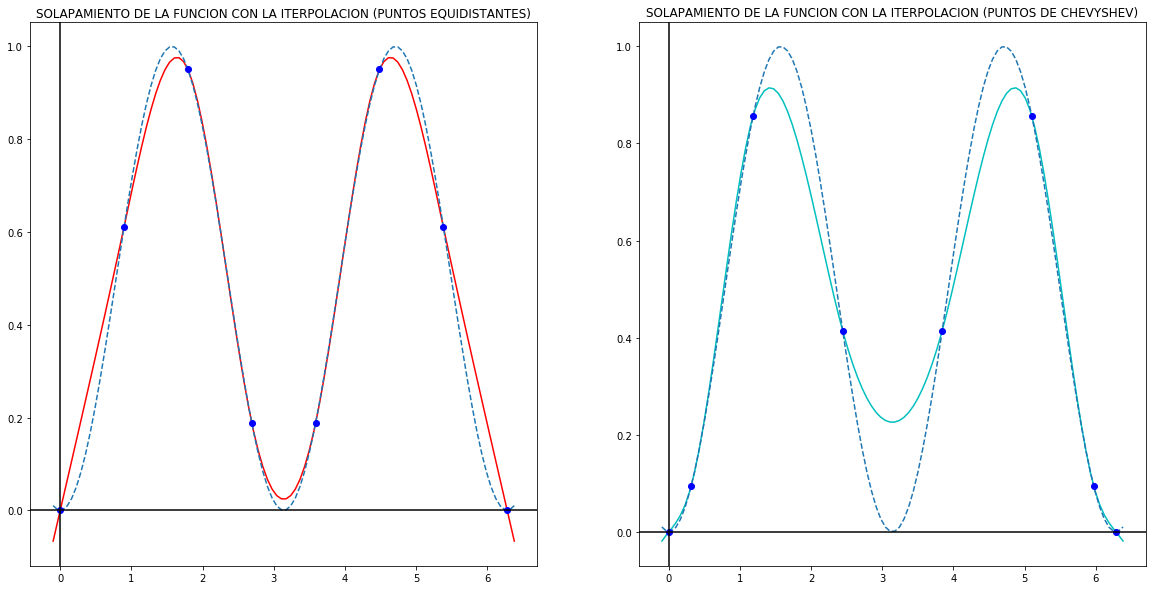

In [26]:
print("############# PREGUNTA NUMERO 3 ############################")
# Armamos la data que tiene puntos igualmente espaciados
x1 = np.linspace(0,2*np.pi,8) 
y1 = np.sin(x1)**2 # recuerda que esta en radianes
data1 = np.array([x1,y1],dtype= np.float64)
# Armamos la data con los puntos de chevyshev 
x2_inverso = punto_chevy1(0,2*np.pi,n=7) # 8 puntos necesitamos ( se pone 7 debido a como esta definida la funcion)
x2 = [arg for arg in reversed(x2_inverso) if True ]# con esto inviertes   
y2 = np.sin(x2)**2 # recuerda que esta en radianes
data2 = np.array([x2,y2],dtype= np.float64)


### Creamos las funciones interpolantes 
spline1 = creador_spline_cubico(data1.copy())
spline2 = creador_spline_cubico(data2.copy())

x1rango = np.linspace(-0.1,2*np.pi+0.1,100)
x2rango = np.linspace(-0.1,2*np.pi+0.1,100)
fig, axes = plt.subplots(nrows=1,ncols=2 , figsize = (20,10)) # fig es la figura y axes son los ejes (son elementos de cada figura)

# Tuve que usar una "list comprehesion" . 
# Esto es necesario ya que mis funciones no reciben listas como
# parametros 
axes[0].plot(x1rango,[spline1(arg) for arg in x1rango.copy() if True],'r')
axes[0].plot(x1rango,np.sin(x1rango)**2,'--')
axes[0].plot(data1[0],data1[1],'ob')
axes[0].axhline(0, color="black")
axes[0].axvline(0, color="black")
axes[0].set_title('SOLAPAMIENTO DE LA FUNCION CON LA ITERPOLACION (PUNTOS EQUIDISTANTES)')

axes[1].plot(x2rango,[spline2(arg) for arg in x2rango if True],'c')
axes[1].plot(x2rango,np.sin(x2rango)**2,'--')
axes[1].plot(data2[0],data2[1],'ob')
axes[1].axhline(0, color="black")
axes[1].axvline(0, color="black")
axes[1].set_title('SOLAPAMIENTO DE LA FUNCION CON LA ITERPOLACION (PUNTOS DE CHEVYSHEV)')

### La diferencia se debe a que hemos escogido el spline periodico .
## ( Derivadas segundas en los extremos cero)
plt.show()